# import libraries

In [134]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sb

# preprocessing

In [198]:
train = pd.read_csv('adult.data.csv')
test = pd.read_csv('adult.test.csv')

In [199]:
data = pd.concat([train,test])

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age              48842 non-null int64
workclass        48842 non-null object
weight           48842 non-null int64
education        48842 non-null object
education-num    48842 non-null int64
status           48842 non-null object
occupation       48842 non-null object
relationship     48842 non-null object
race             48842 non-null object
sex              48842 non-null object
gain             48842 non-null int64
loss             48842 non-null int64
hpw              48842 non-null int64
country          48842 non-null object
target           48842 non-null object
dtypes: int64(6), object(9)
memory usage: 4.3+ MB


age -> cont <br>
workclass -> cat<br>
weight -> int <br>
education -> cat  drop it<br>
education-num -> int <br>
status -> ordinal<br>
occupation -> cat<br>
relationship -> cat<br>
race-> cat<br>
sex -> binary cat <br>
country -> cat<br>
hpw -> cont<br>
gain,loss -> cont <br>

In [165]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 9 columns):
workclass       48842 non-null object
education       48842 non-null object
status          48842 non-null object
occupation      48842 non-null object
relationship    48842 non-null object
race            48842 non-null object
sex             48842 non-null object
country         48842 non-null object
target          48842 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [166]:
data.describe()

,age,weight,education-num,gain,loss,hpw
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [200]:
for col in cat_data.columns:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes


In [201]:
train = data[:32561]
test = data[32560:]

In [202]:
corr = train.corr()
abs(corr>=0.3)

,age,workclass,weight,education,education-num,status,occupation,relationship,race,sex,gain,loss,hpw,country,target
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
workclass,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
weight,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
education,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
education-num,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True
status,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
occupation,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
relationship,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
race,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
sex,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


# Missing values

# Distribution

# outliers

{'boxes': [<matplotlib.lines.Line2D at 0x29727fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x38652b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10353430>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1034aff0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1f67d230>,
  <matplotlib.lines.Line2D at 0x10353190>]}

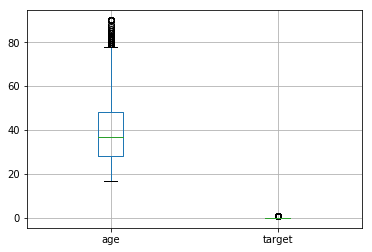

In [144]:
train[['age','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x5e4e3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x5e4eb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x5e52330>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x5e4eef0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x5e4e670>,
  <matplotlib.lines.Line2D at 0x5e52090>]}

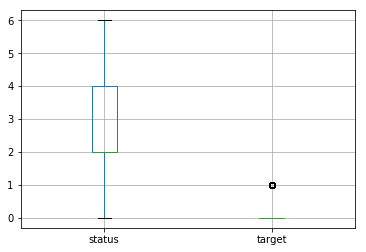

In [145]:
train[['status','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x5e88750>,
 'caps': [<matplotlib.lines.Line2D at 0x5e88ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x5e90690>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x5e90450>,
 'whiskers': [<matplotlib.lines.Line2D at 0x5e889d0>,
  <matplotlib.lines.Line2D at 0x5e903f0>]}

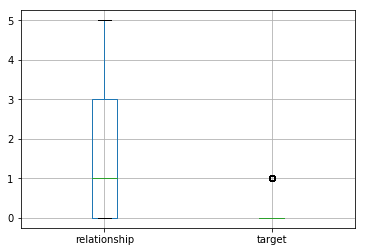

In [146]:
train[['relationship','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x29df3890>,
 'caps': [<matplotlib.lines.Line2D at 0x29127a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x29127870>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29127c70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10442ad0>,
  <matplotlib.lines.Line2D at 0x29127df0>]}

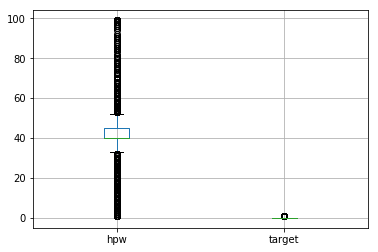

In [205]:
train[['hpw','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x29233950>,
 'caps': [<matplotlib.lines.Line2D at 0x29233f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2923b890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2923b650>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29233bd0>,
  <matplotlib.lines.Line2D at 0x2923b5f0>]}

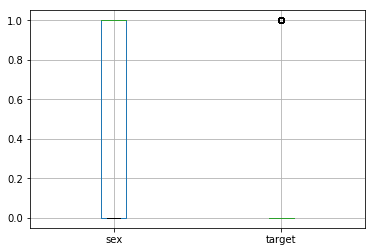

In [206]:
train[['sex','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x29a72a10>,
 'caps': [<matplotlib.lines.Line2D at 0x29a72ff0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29a7b950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29a7b710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x29a72c90>,
  <matplotlib.lines.Line2D at 0x29a7b6b0>]}

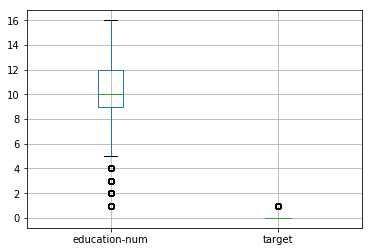

In [207]:
train[['education-num','target']].boxplot(return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x290f6bf0>],
 'caps': [<matplotlib.lines.Line2D at 0x290ff390>,
 'fliers': [<matplotlib.lines.Line2D at 0x290ffb30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x290ff8f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x290f6e70>,
  <matplotlib.lines.Line2D at 0x290f6f70>]}

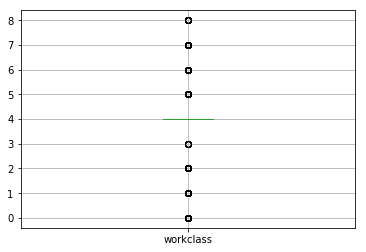

In [150]:
train[['workclass']].boxplot(return_type='dict')